In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math


%matplotlib inline

In [2]:
def leaky_relu(z, alpha=0.1):
    return np.maximum(alpha*z, z)

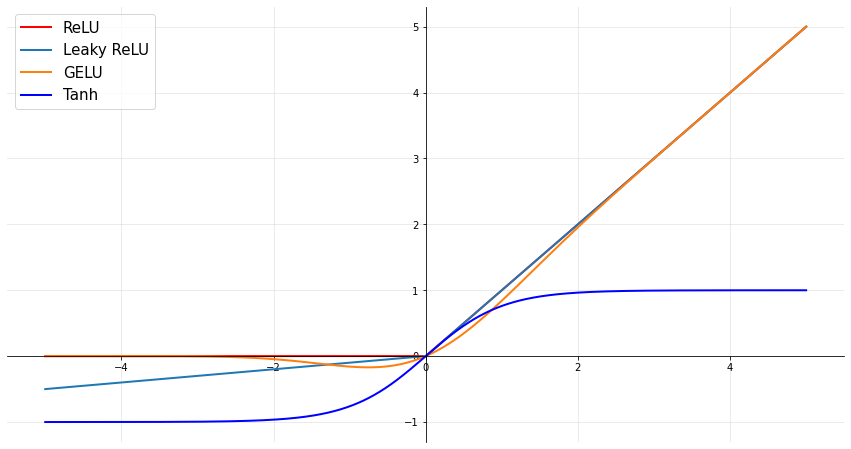

In [3]:
font_style = dict(family='DejaVu Sans', weight='black', size=14)

fig = plt.figure(figsize=(15, 8))
plt.grid(alpha=0.3)

ax = plt.gca()  # get current axis 获得坐标轴对象

# 将右边、上边这两条边颜色设置为空 其实就相当于抹掉这两条边
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 指定下边作为x轴，指定左边作为y轴
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# 指定data设置的bottom(也就是指定的x轴)绑定到y轴的0这个点上
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

x = torch.linspace(-5, 5, 5000)
y1 = 0.5 * x * (1 + torch.tanh(math.sqrt(2/math.pi) * (x + 0.044715 * x**3)))
y2 = (math.e**x - math.e**(-x)) / (math.e**x + math.e**(-x))
y3 = torch.max(torch.Tensor([0]), x)
# 函数图像
plt.plot(x.numpy(), y3.numpy(), 'r-', linewidth=2, label='ReLU')
plt.plot(x.numpy(), leaky_relu(x, 0.1), linewidth=2, label='Leaky ReLU')
plt.plot(x.numpy(), y1.numpy(), linewidth=2, label='GELU')
plt.plot(x.numpy(), y2.numpy(), 'b-', linewidth=2, label='Tanh')
plt.legend(fontsize=15)
plt.show()
fig.savefig('./activation.pdf', dpi=300, bbox_inches='tight')

In [4]:
help(nn.GELU)

Help on class GELU in module torch.nn.modules.activation:

class GELU(torch.nn.modules.module.Module)
 |  GELU() -> None
 |  
 |  Applies the Gaussian Error Linear Units function:
 |  
 |  .. math:: \text{GELU}(x) = x * \Phi(x)
 |  
 |  where :math:`\Phi(x)` is the Cumulative Distribution Function for Gaussian Distribution.
 |  
 |  Shape:
 |      - Input: :math:`(*)`, where :math:`*` means any number of dimensions.
 |      - Output: :math:`(*)`, same shape as the input.
 |  
 |  .. image:: ../scripts/activation_images/GELU.png
 |  
 |  Examples::
 |  
 |      >>> m = nn.GELU()
 |      >>> input = torch.randn(2)
 |      >>> output = m(input)
 |  
 |  Method resolution order:
 |      GELU
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  forward(self, input: torch.Tensor) -> torch.Tensor
 |      Defines the computation performed at every call.
 |      
 |      Should be overridden by all subclasses.
 |      
 |      .. note::
 |      

\begin{equation}
%\text{GELU}(x) = x * \Phi(x)
\text{GELU}(x) = 0.5 * x * (1 + \text{Tanh}(\sqrt{2 / \pi} * (x + 0.044715 * x^3)))
\end{equation}